# Importing Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


# Loading Dataset

In [35]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

In [36]:
type(X_train)

numpy.ndarray

In [37]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [38]:
print(X_train[15])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

In [39]:
print(X_train[15].shape)

(28, 28)


2


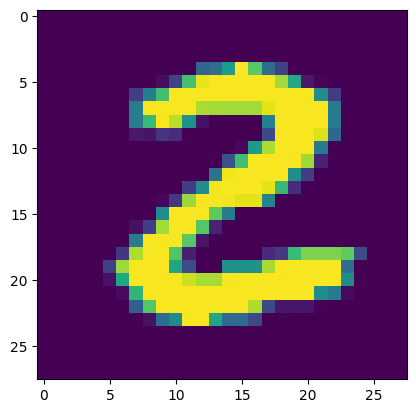

In [40]:
#For displaying an image
plt.imshow(X_train[25])
plt.show

print(Y_train[25])

# Image Levels

In [41]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [42]:
#Unique values in Y_train
print(np.unique(Y_train))
#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [43]:
#scale the values
X_train=X_train/255
X_test=X_test/255

In [44]:
print(X_train[15])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Build the Neural Network

In [45]:
#setting the layers of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
#Compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
#training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8513 - loss: 0.5084
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9544 - loss: 0.1506
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9675 - loss: 0.1076
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9745 - loss: 0.0849
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9791 - loss: 0.0689
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9828 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0416
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9888 - loss: 0.0371
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0325


In [48]:
loss, accuracy=model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9657 - loss: 0.1341
0.970300018787384


In [49]:
print(X_test.shape)

(10000, 28, 28)


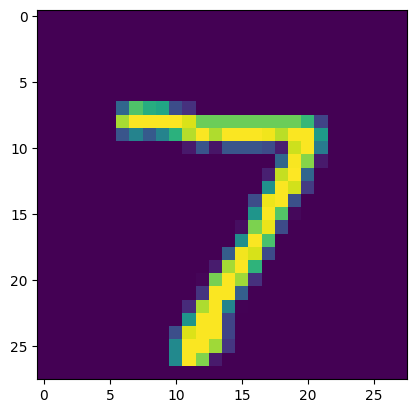

In [50]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [51]:
print(Y_test[0])

7


In [52]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [53]:
print(Y_pred.shape)

(10000, 10)


In [54]:
print(Y_pred[0])

[2.3047561e-03 6.5101677e-01 8.1447095e-01 9.9385226e-01 2.8224928e-08
 1.9551952e-01 8.4542636e-14 9.9999952e-01 4.5590731e-03 6.8520826e-01]


In [55]:
#converting the prediction probabilities to class label
label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [56]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 3, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 9, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [57]:
conf_mat=confusion_matrix(Y_test, Y_pred_labels)

In [58]:
print(conf_mat)

tf.Tensor(
[[ 957    0    4    2    3    4    2    0    2    6]
 [   0 1118    3    4    1    0    1    1    7    0]
 [   1    1  995    5    5    0    4   14    6    1]
 [   2    0    4  989    2    2    0    2    4    5]
 [   0    0    1    0  972    0    1    2    0    6]
 [   2    1    1   34    2  838    5    1    3    5]
 [   4    3    2    1    6    6  930    0    6    0]
 [   2    2    8    4    1    0    1  999    1   10]
 [   4    2    9   18    9    4    5    3  917    3]
 [   1    3    0    5   19    2    0    7    5  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

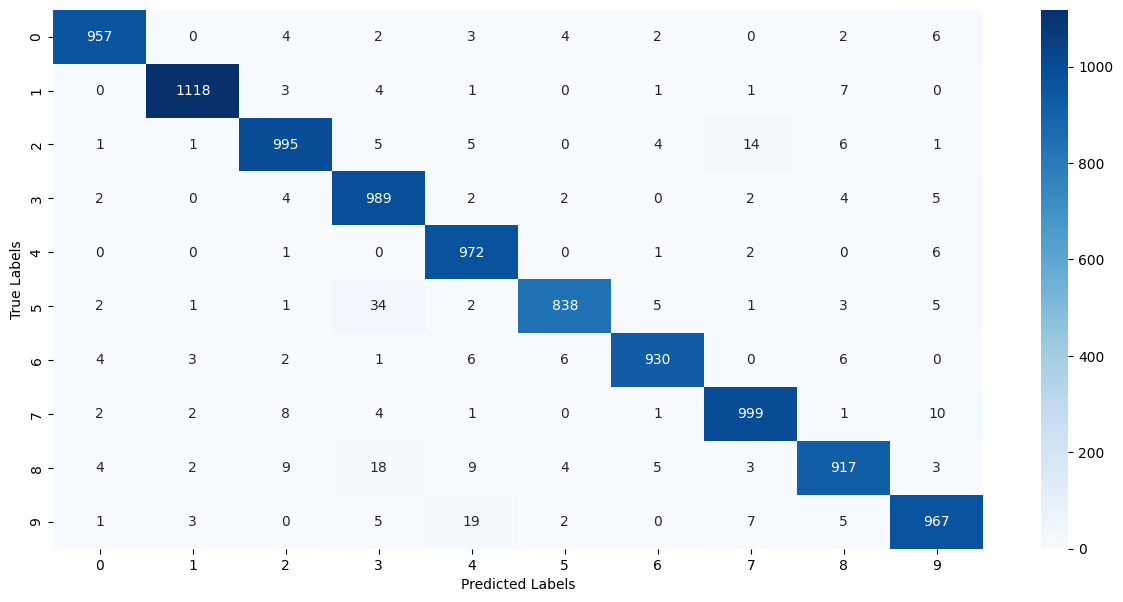

In [59]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Building a Prediction System

In [63]:
input_image_path= '/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)

In [64]:
type(input_image)

numpy.ndarray

In [65]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


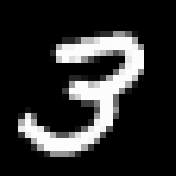

In [66]:
cv2_imshow(input_image)

In [67]:
input_image.shape

(176, 176, 3)

In [68]:
greyscale=cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [69]:
greyscale.shape

(176, 176)

In [70]:
input_image_resize=cv2.resize(greyscale, (28,28))

In [71]:
input_image_resize.shape

(28, 28)

In [72]:
cv2_imshow(input_image_resize)

In [73]:
input_image_resize=input_image_resize/255

In [74]:
type(input_image_resize)

numpy.ndarray

In [75]:
image_reshaped=np.reshape(input_image_resize, [1,28,28])

In [76]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1.16711814e-14 4.54147405e-04 2.07356134e-05 1.00000000e+00
  2.72872475e-10 9.85075533e-01 5.84472517e-25 7.35408664e-01
  9.94263470e-01 9.99994874e-01]]


In [77]:
input_pred_label=np.argmax(input_prediction)

In [78]:
print(input_pred_label)

3


Path of the image to be predicted:/content/MNIST_digit.png


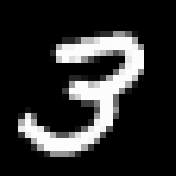

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The Handwritten Digit is recognised as: 3


In [79]:
input_image_path=input('Path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(greyscale, (28, 28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize, [1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('The Handwritten Digit is recognised as:', input_pred_label)